In [36]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [218]:
rng = np.random.default_rng()
X = rng.normal(size=(100_000, 256))
Y = X.sum(axis=1)
Y = (Y - Y.min()) / (Y.max() - Y.min())

In [219]:
def create_model() -> tf.keras.Model:
    inputs = tf.keras.Input((256,))
    x = tf.keras.layers.Dense(100, activation="relu")(inputs)
    x = tf.keras.layers.Dense(50, activation="relu")(x)
    x = tf.keras.layers.Dense(1)(x)
    model = tf.keras.Model(inputs=inputs, outputs=x)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        loss="mean_squared_error",
        metrics=["accuracy"]
    )
    return model

In [220]:
model = create_model()
model.fit(X, Y, epochs=3)

Epoch 1/3
3125/3125 [==============================] - 2s 469us/step - loss: 0.0062 - accuracy: 2.0000e-05
Epoch 2/3
3125/3125 [==============================] - 2s 497us/step - loss: 1.3883e-04 - accuracy: 2.0000e-05
Epoch 3/3
3125/3125 [==============================] - 1s 479us/step - loss: 1.2906e-04 - accuracy: 2.0000e-05


In [221]:
P = model.predict(X)

3125/3125 [==============================] - 1s 289us/step


In [222]:
P

array([[0.6432546 ],
       [0.5060322 ],
       [0.52261925],
       ...,
       [0.4924669 ],
       [0.6688723 ],
       [0.6773242 ]], dtype=float32)

(array([3.7000e+01, 6.9000e+02, 5.2700e+03, 1.8733e+04, 3.0694e+04,
        2.8192e+04, 1.2845e+04, 3.1080e+03, 4.0600e+02, 2.5000e+01]),
 array([0.02456194, 0.12409843, 0.22363491, 0.32317141, 0.42270789,
        0.52224433, 0.62178087, 0.72131735, 0.82085383, 0.92039031,
        1.01992679]),
 <BarContainer object of 10 artists>)

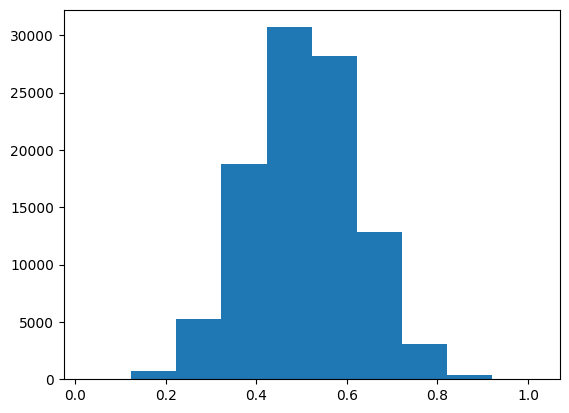

In [223]:
plt.hist(P)

In [224]:
def prob(x, P):
    if x > P.mean():
        return (P > x).mean()
    return (P <= x).mean()

In [226]:
prob(0.5, P)

0.4815

In [202]:
def create_model() -> tf.keras.Model:
    inputs = tf.keras.Input((256,))
    x = tf.keras.layers.Dense(100, activation="relu")(inputs)
    x = tf.keras.layers.Dense(50, activation="relu")(x)
    mean = tf.keras.layers.Dense(3)(x)
    stddev = tf.keras.layers.Dense(3, activation="sigmoid")(x)
    x = tf.keras.layers.Lambda(lambda inputs: tf.random.normal(tf.shape(inputs[0]), mean=inputs[0], stddev=inputs[1]))([mean, stddev])
    x = tf.keras.layers.Dense(1, activation="sigmoid")(x)
    model = tf.keras.Model(inputs=inputs, outputs=x)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

model = create_model()
model.fit(X, Y.round(), epochs=2)

Epoch 1/2
3125/3125 [==============================] - 2s 552us/step - loss: 0.1189 - accuracy: 0.9481
Epoch 2/2
3125/3125 [==============================] - 2s 544us/step - loss: 0.0674 - accuracy: 0.9713


In [203]:
A = rng.normal(size=(3, 256))
model.predict(A[0:3])

1/1 [==============================] - 0s 29ms/step


array([[0.8866449 ],
       [0.99998826],
       [1.        ]], dtype=float32)

In [204]:
def forward(funcs, x):
    for f in funcs:
        x = f(x)
    return x

In [107]:
model.layers

In [205]:
means = forward(model.layers[:3] + model.layers[3:4], A)
stds = forward(model.layers[:3] + model.layers[4:5], A)

In [206]:
means

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[   2.747542 ,   -7.884355 ,   -1.9965118],
       [  18.246403 ,  -75.7556   ,  -21.434456 ],
       [  37.210224 , -203.8406   ,  -70.11396  ]], dtype=float32)>

In [207]:
stds

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[6.4501375e-02, 2.2939528e-07, 3.2979432e-01],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00]], dtype=float32)>

In [212]:
np.array([model.layers[-1](tf.random.normal(tf.shape(means), mean=means, stddev=stds)).numpy() for _ in range(1000)]).mean(axis=0)

array([[0.8872239 ],
       [0.99999636],
       [1.        ]], dtype=float32)